### Random Forest Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

In [2]:
digits = load_digits()

In [16]:
data = scale(digits.data)
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [17]:
data.shape

(1797, 64)

In [18]:
n_digits = len(np.unique(digits.target))
labels = digits.target

print(n_digits)
print(labels)

10
[0 1 2 ..., 8 9 8]


In [58]:
clf = RandomForestClassifier(n_estimators=10, 
                             max_depth=5,
                             criterion='entropy')

In [59]:
clf.fit(data, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
scores = clf.score(data, labels)
print(scores)

0.938230383973


In [61]:
importances = clf.feature_importances_
indexes = np.argsort(importances)
print(indexes)

[ 0 57 56 55 49 48 47 40 39 32 24 23 16 15 31  8  1  7 11 63  4 17 52 59  3
  6 14 12 37  9 60 41 22  2 46 29 18 35 13 58 45 19 25  5 53 62 61 27 50 51
 44 26 34 30 10 28 20 21 42 36 38 33 54 43]


In [62]:
ind = []
for index in indexes:
    ind.append(labels[index])

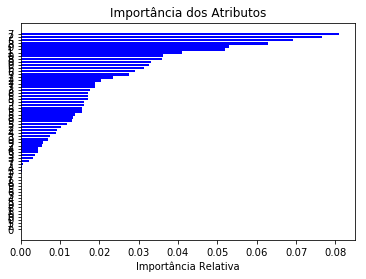

In [63]:
plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indexes)), importances[indexes], color='b', align='center')
plt.yticks(range(len(indexes)), ind)
plt.xlabel('Importância Relativa')
plt.show()